# Flow analysis:  OD-2017 research

In [52]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

In [53]:
# reading OD dataset
od_path = '../data/ODs/OD_2017.csv'
df = pd.read_csv(od_path)

In [54]:
# selecting required columns
trips = df[['ZONA_O', 'MUNI_O', 'ZONA_D', 'MUNI_D', 'FE_VIA','MODOPRIN']] 
trips.columns

Index(['ZONA_O', 'MUNI_O', 'ZONA_D', 'MUNI_D', 'FE_VIA', 'MODOPRIN'], dtype='object')

In [55]:
trips.head(5) # how trips looks 

,ZONA_O,MUNI_O,ZONA_D,MUNI_D,FE_VIA,MODOPRIN
0,1.0,36.0,3.0,36.0,22.132647,16.0
1,3.0,36.0,1.0,36.0,22.132647,16.0
2,1.0,36.0,82.0,36.0,18.882487,1.0
3,82.0,36.0,84.0,36.0,18.882487,1.0
4,84.0,36.0,1.0,36.0,18.882487,12.0


In [56]:
# grouping MODOPRIN
grouped_trips = trips.groupby('MODOPRIN')['FE_VIA'].sum().reset_index()
grouped_trips.tail(2)

,MODOPRIN,FE_VIA
15,16.0,1.334988e+07
16,17.0,1.117166e+05


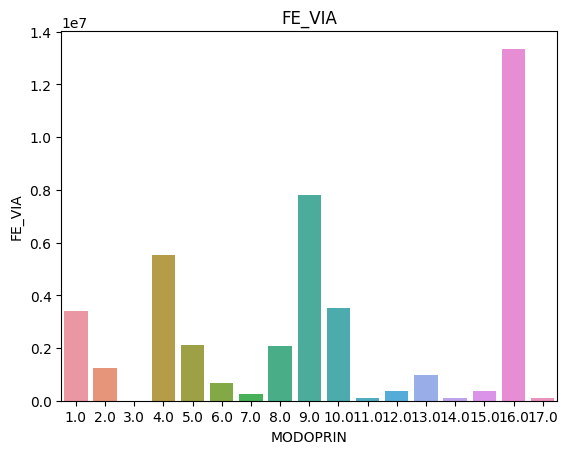

In [57]:
# entender fator de expansão

# FE_VIA mean by MODOPRIN
sns.barplot(x='MODOPRIN', y='FE_VIA', data=grouped_trips)
plt.title('FE_VIA')
plt.show()

### Representativade dos meios de transporte

In [58]:
# count transport mode
transport_modes = trips['MODOPRIN'].value_counts().reset_index()
rows_sum = transport_modes['count'].sum()
print(f"Rows sum = {rows_sum:,}")

Rows sum = 157,992


In [59]:
# transport mode representation
transport_modes['Representation'] = (((transport_modes['count'] / rows_sum)*100).round(2)).apply(lambda x: f'{x:.2f}%')
transport_modes

,MODOPRIN,count,Representation
0,16.0,48285,30.56%
1,9.0,37005,23.42%
2,4.0,18612,11.78%
3,1.0,14077,8.91%
4,10.0,13308,8.42%
5,8.0,6463,4.09%
6,5.0,5565,3.52%
7,13.0,3045,1.93%
8,2.0,2926,1.85%
9,6.0,2795,1.77%


In [60]:
# Modos de transporte com mais viagens
most_trips_transp_modes = transport_modes.head(5)
most_trips_transp_modes

,MODOPRIN,count,Representation
0,16.0,48285,30.56%
1,9.0,37005,23.42%
2,4.0,18612,11.78%
3,1.0,14077,8.91%
4,10.0,13308,8.42%


In [61]:
t_modes = {
    'ID': list(range(1,18)),
    'T_Mode': ['Metrô', 'Trem', 'Monotrilho', 'Ônibus/micro-ônibus/perua do município de São Paulo', 
               'Ônibus/micro-ônibus/perua de outros municípios', 'Ônibus/micro-ônibus/perua metropolitano', 'Transporte Fretado', 
               'Transporte Escolar', 'Dirigindo Automóvel', 'Passageiro de Automóvel', 'Táxi Convencional', 'Táxi não Convencional',
               'Dirigindo Moto', 'Passageiro de Moto', 'Bicicleta', 'A Pé', 'Outros']
}
df_t_modes = pd.DataFrame(t_modes)
df_t_modes.head(3)

,ID,T_Mode
0,1,Metrô
1,2,Trem
2,3,Monotrilho


In [62]:
most_trips_transp_modes_merged = pd.merge(most_trips_transp_modes, df_t_modes, 'left', left_on='MODOPRIN', right_on='ID')
most_trips_transp_modes_merged.head(2)

,MODOPRIN,count,Representation,ID,T_Mode
0,16.0,48285,30.56%,16,A Pé
1,9.0,37005,23.42%,9,Dirigindo Automóvel


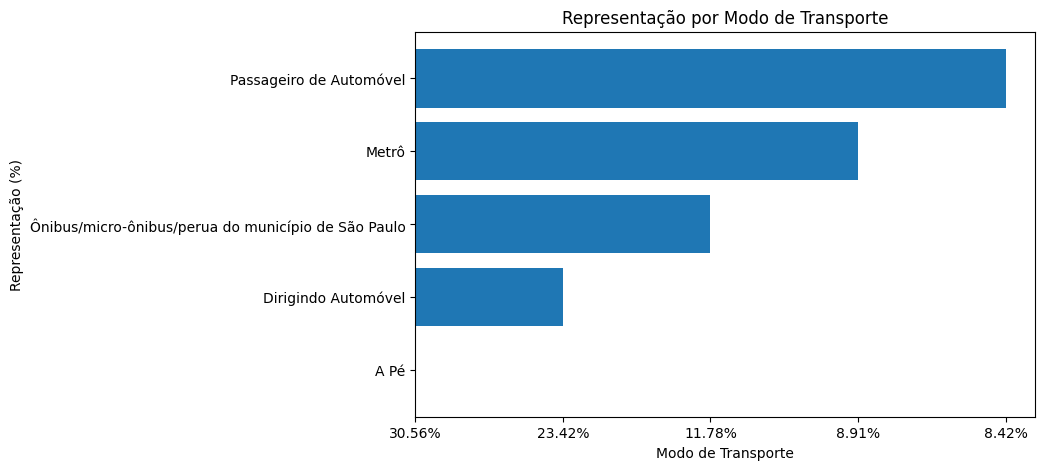

In [63]:
# Ajustar orientação de gráfico

# Graph bar (representation) 
plt.figure(figsize=(8, 5))
plt.barh(most_trips_transp_modes_merged['T_Mode'], most_trips_transp_modes_merged['Representation'])

plt.title('Representação por Modo de Transporte')
plt.xlabel('Modo de Transporte')
plt.ylabel('Representação (%)')

plt.show()

### Análise censitária
Mini glossário

Coluna 50 - SEXO:
- 1: Masculino;
- 2: Feminino.

In [64]:
gendered_trips = df[['ZONA_O', 'MUNI_O', 'ZONA_D', 'MUNI_D', 'FE_VIA','MODOPRIN', 'SEXO']] 
gendered_trips.head(3)

,ZONA_O,MUNI_O,ZONA_D,MUNI_D,FE_VIA,MODOPRIN,SEXO
0,1.0,36.0,3.0,36.0,22.132647,16.0,2
1,3.0,36.0,1.0,36.0,22.132647,16.0,2
2,1.0,36.0,82.0,36.0,18.882487,1.0,2


In [68]:
# Counting gender frequency
gender_counter = (gendered_trips['SEXO'].value_counts(normalize=True)*100).round(2)
gender_counter.index = gender_counter.index.map({1: 'Masculino', 2: 'Feminino'}) # mapping values to corresponding labels
print(gender_counter)

SEXO
Feminino     51.29
Masculino    48.71
Name: proportion, dtype: float64


In [66]:
pedestrian_gendered_trips = gendered_trips[gendered_trips["MODOPRIN"]==16] # filter pedestrian trips

In [70]:
ped_gender_counter = (pedestrian_gendered_trips['SEXO'].value_counts(normalize=True)*100).round(2)
ped_gender_counter.index = ped_gender_counter.index.map({1: 'Masculino', 2: 'Feminino'}) # mapping values to corresponding labels
print(ped_gender_counter)

SEXO
Feminino     53.04
Masculino    46.96
Name: proportion, dtype: float64
